In [8]:
import pandas as pd
df = pd.read_csv("daily_COST.csv")
df = df.iloc[::-1].reset_index(drop=True)
print(df.head())
print(df.tail())

  timestamp    open    high      low   close   volume  candle  rsi
0  2/1/2015  141.87  143.15  140.814  141.61  1471736   False  NaN
1  5/1/2015  141.69  142.16  139.800  140.00  1751693   False  NaN
2  6/1/2015  140.61  142.94  139.850  141.85  3187950    True  NaN
3  7/1/2015  142.60  144.43  142.360  144.32  2171551    True  NaN
4  8/1/2015  145.56  146.10  144.940  145.56  2937674   False  NaN
       timestamp    open     high       low   close   volume  candle  \
2513  27/12/2024  948.72  950.450  932.0001  939.70  1943440   False   
2514  30/12/2024  931.00  934.170  915.5000  922.21  1881241   False   
2515  31/12/2024  923.65  924.739  912.5400  916.27  1742939   False   
2516    2/1/2025  915.00  925.770  902.0000  909.81  1767658   False   
2517    3/1/2025  914.33  924.210  911.0001  916.58  1614211    True   

            rsi  
2513  35.714286  
2514  35.714286  
2515  28.571429  
2516  28.571429  
2517  35.714286  


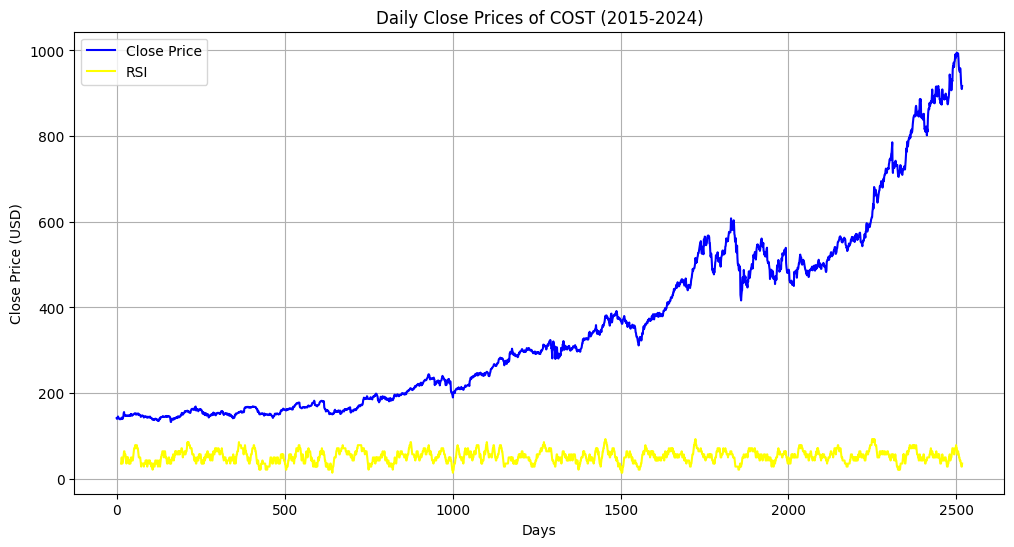

In [9]:
import matplotlib.pyplot as plt
# Plot the "close" prices
plt.figure(figsize=(12, 6))
plt.plot(df['close'], label='Close Price', color='blue')
plt.plot(df['rsi'], label="RSI", color="yellow")
plt.title('Daily Close Prices of COST (2015-2024)')
plt.xlabel('Days')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [17]:
MIN_RSI = 40
MAX_RSI = 100 - MIN_RSI
TP = 0.08  # Take profit: 0.8%
SL = 0.01  # Stop loss: 0.5%

# Initialize variables for logging results
profit_loss_log = []
trade_log = []
open_positions = []
total_trades = 0
winning_trades = 0
time_in_trades = []

# Open log file
with open("trade_log.txt", "w") as log_file:
    log_file.write("Trade Log\n")
    log_file.write("=" * 40 + "\n")

    # Iterate through data
    for i, row in df.iterrows():
        close_price = row["close"]
        rsi = row["rsi"]
        current_date = row["timestamp"]  # Assuming a 'date' column in the DataFrame

        # Check open positions
        updated_positions = []
        for position in open_positions:
            if position["type"] == "LONG":
                tp_price = position["entry"] * (1 + TP)
                sl_price = position["entry"] * (1 - SL)
                if close_price >= tp_price or close_price <= sl_price:
                    # Calculate profit/loss
                    result = (
                        (tp_price - position["entry"]) / position["entry"] * 100
                        if close_price >= tp_price
                        else (sl_price - position["entry"]) / position["entry"] * 100
                    )
                    profit_loss_log.append(result)
                    trade_log.append(
                        f"Trade {total_trades + 1}: Entered LONG @ {position['entry']} on {position['entry_date']} "
                        f"and EXITED @ {close_price} on {current_date} for a profit/loss of {result:.2f}%\n"
                    )
                    log_file.write(trade_log[-1])
                    total_trades += 1
                    if result > 0:
                        winning_trades += 1
                else:
                    updated_positions.append(position)
            elif position["type"] == "SHORT":
                tp_price = position["entry"] * (1 - TP)
                sl_price = position["entry"] * (1 + SL)
                if close_price <= tp_price or close_price >= sl_price:
                    # Calculate profit/loss
                    result = (
                        (position["entry"] - tp_price) / position["entry"] * 100
                        if close_price <= tp_price
                        else (position["entry"] - sl_price) / position["entry"] * 100
                    )
                    profit_loss_log.append(result)
                    trade_log.append(
                        f"Trade {total_trades + 1}: Entered SHORT @ {position['entry']} on {position['entry_date']} "
                        f"and EXITED @ {close_price} on {current_date} for a profit/loss of {result:.2f}%\n"
                    )
                    log_file.write(trade_log[-1])
                    total_trades += 1
                    if result > 0:
                        winning_trades += 1
                else:
                    updated_positions.append(position)

        open_positions = updated_positions

        # Check for new trades
        if rsi < MIN_RSI:
            open_positions.append(
                {"type": "LONG", "entry": close_price, "entry_date": current_date}
            )
        elif rsi > MAX_RSI:
            open_positions.append(
                {"type": "SHORT", "entry": close_price, "entry_date": current_date}
            )

    # Calculate and log statistics
    win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0

    log_file.write("\nSummary Statistics\n")
    log_file.write("=" * 40 + "\n")
    log_file.write(f"Total Trades: {total_trades}\n")
    log_file.write(f"Win Rate: {win_rate:.2f}%\n")
    log_file.write(f"Total Profit/Loss: {sum(profit_loss_log):.2f}%\n")

# Console outputs
print(f"Total Trades: {total_trades}")
print(f"Win Rate: {win_rate:.2f}%")
print(f"Total Profit/Loss: {sum(profit_loss_log):.2f}%")
print(profit_loss_log)


Total Trades: 1115
Win Rate: 16.77%
Total Profit/Loss: 568.00%
[-1.0000000000000004, 8.000000000000002, -1.000000000000007, -0.9999999999999974, -1.0000000000000056, -0.9999999999999943, -1.0000000000000093, -0.9999999999999962, -1.0000000000000024, -0.9999999999999917, -0.9999999999999974, -1.0000000000000095, -1.0000000000000053, -0.999999999999999, -1.0000000000000007, -0.9999999999999981, -0.9999999999999987, -0.9999999999999948, -1.0000000000000089, -1.0000000000000095, -1.0000000000000078, 8.000000000000004, -0.9999999999999917, -1.0000000000000069, -1.000000000000003, -0.9999999999999983, -1.0000000000000058, -0.9999999999999953, -1.0000000000000013, -0.9999999999999923, -0.9999999999999991, -0.9999999999999963, -1.0000000000000007, -1.0000000000000036, -1.000000000000003, 7.9999999999999964, 7.999999999999989, -0.9999999999999913, -1.000000000000009, -1.0000000000000024, -1.0000000000000016, 8.0, 7.999999999999997, 7.999999999999999, 7.999999999999995, 7.999999999999988, 7.9999